# Implementing Neural Networks in PyTorch

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch03_CNN/ec03_1_cnn/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></div>

This notebook provides you with a set of code examples to implement neural networks with PyTorch.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 3-1 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Understanding Convolutions

Implement a moving average with a 1D convolution ...

In [1]:
import numpy as np

signal = np.array([0, 2, 0, 2, 0, 2, 0, 2, 0])

filter1d = np.ones(2) / 2

conv1d_length = signal.shape[0] - filter1d.shape[0] + 1
conv1d = np.zeros((conv1d_length,))
for i in range(conv1d_length):
    conv1d[i] = np.sum(signal[i:i + filter1d.shape[0]] * filter1d)

print(conv1d)

[1. 1. 1. 1. 1. 1. 1. 1.]


... and implement a 2D convolution.

In [2]:
image = np.array([
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
])

filter2d = np.ones((2, 2)) / 4

conv2d_height = image.shape[0] - filter2d.shape[0] + 1
conv2d_width = image.shape[1] - filter2d.shape[1] + 1
conv2d = np.zeros((conv2d_height, conv2d_width))
for i in range(conv2d_height):
    for j in range(conv2d_width):
        conv2d[i, j] = np.sum(
            image[i:i + filter2d.shape[0], j:j + filter2d.shape[1]] * filter2d
        )

print(conv2d)

[[1.  0.5 0.  0.5 1.  0.5 0.  0.5 1. ]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.  0.5 1.  0.5 0.  0.5 1.  0.5 0. ]]


## Creating a Sample Image

Create a sample image in PyTorch (note the position of the color channel) ...

In [3]:
import torch

import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

H, W, D, S = 12, 16, 8, 4
image = torch.zeros(1, H, W, D)
for idx in range(0, H, S):
    for idy in range(0, W, S):
        for idz in range(0, D, S):
            image[0, idx:idx + S, idy:idy + S, idz:idz + S] = (-1) ** (idx // S + idy // S + idz // S)


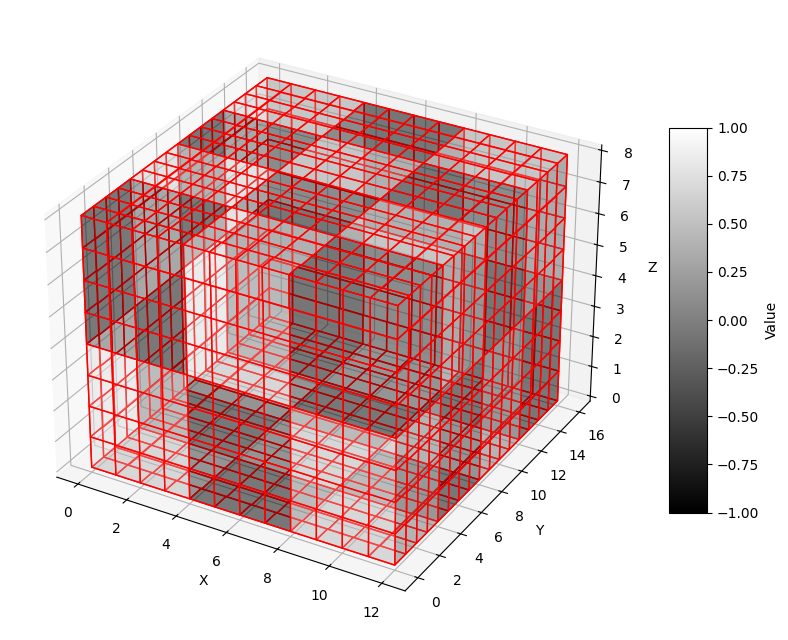

In [4]:
def plot_3d_image(image):
    image_3d = image[0]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    filled = image_3d != 0
    values = image_3d.numpy()

    cmap = plt.cm.gray
    colors = cmap(values)
    colors[..., 3] = 0.3

    ax.voxels(filled.numpy(), facecolors=colors, edgecolor='red')

    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array(values)
    cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label("Value")

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()

plot_3d_image(image)


... implement a function to render the image ...

... and plot the image.

## Implementing Convolutional Layers

Implement a convolutional layer in PyTorch ...

In [5]:
import torch.nn as nn

conv = nn.Conv3d(in_channels=1, out_channels=4, kernel_size=(3, 3, 3), bias=False)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :, :] = torch.tensor([
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
]) / 27

filters[1, 0, :, :, :] = torch.tensor([
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
])

filters[2, 0, :, :, :] = torch.tensor([
    [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
    [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
    [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
])


filters[3, 0, :, :, :] = torch.tensor([
    [[-1, -1, -1], [-1, -1, -1], [-1, -1, -1]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
])




conv.weight = nn.Parameter(filters)

features_conv = conv(image.unsqueeze(0))
print(image.unsqueeze(0).shape)
print(image.shape)

torch.Size([1, 1, 12, 16, 8])
torch.Size([1, 12, 16, 8])


... implement a function to render the multiple channels of an image ...

... and plot the feature maps.

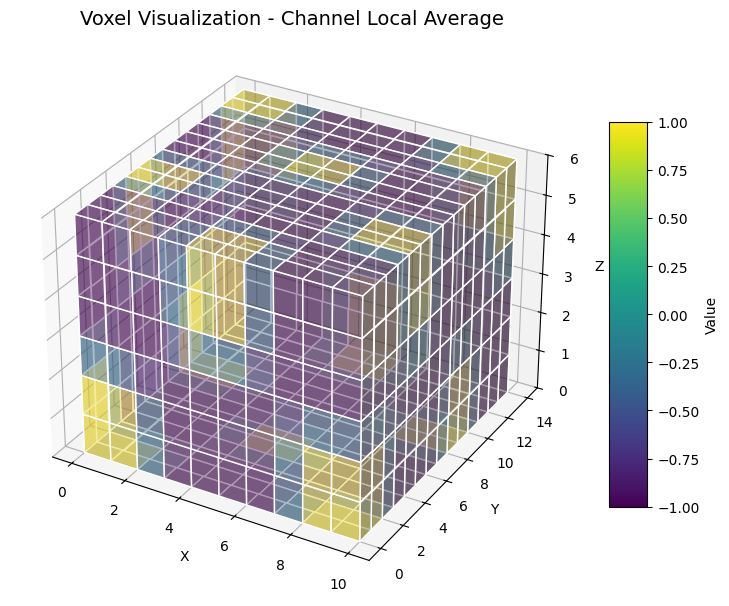

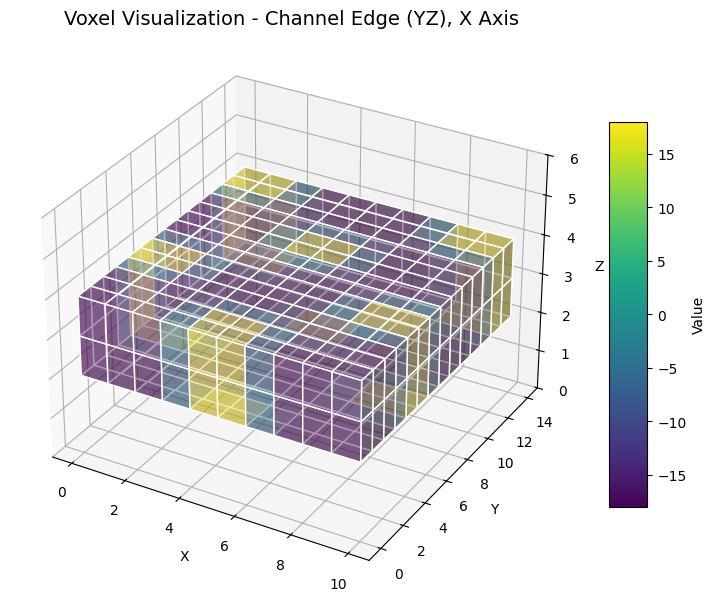

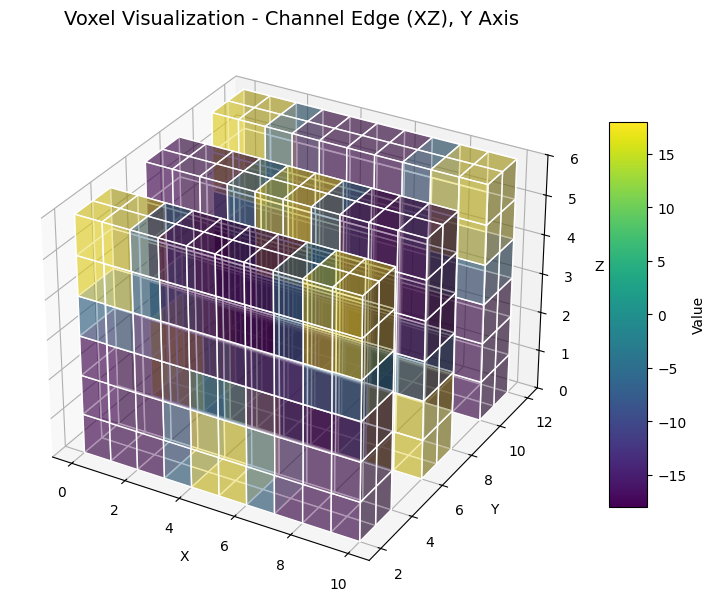

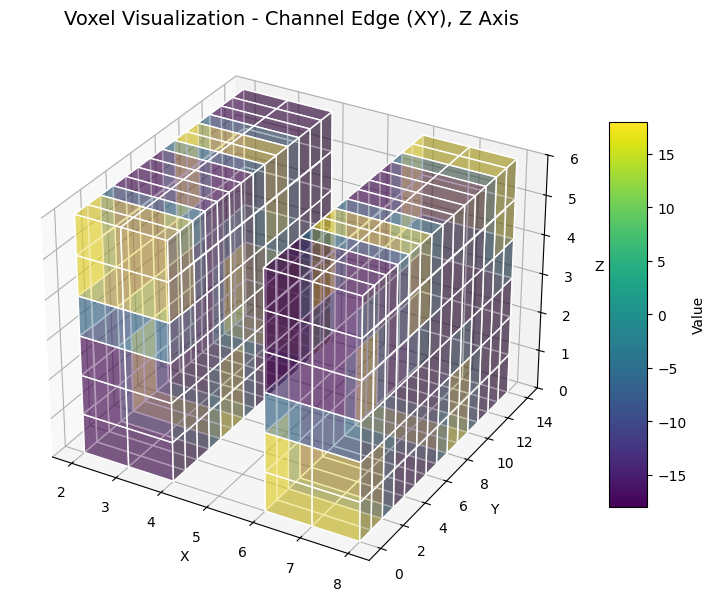

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_channels(features_conv):
    features_conv = features_conv.squeeze().detach().numpy()
    num_channels, depth, height, width = features_conv.shape

    z_min, z_max = 0, 6

    for c in range(num_channels):
        channel_data = features_conv[c]

        fig = plt.figure(figsize=(20, 10))


        ax1 = fig.add_subplot(121, projection='3d')
        if c == 0:
            caption = "Local Average"
        elif c==1:
            caption = "Edge (YZ), X Axis"
        elif c==2:
            caption = "Edge (XZ), Y Axis"
        elif c==3:
            caption = "Edge (XY), Z Axis"

        ax1.set_title(f"Voxel Visualization - Channel {caption}", fontsize=14)

        filled = channel_data != 0
        values = channel_data

        cmap = plt.cm.viridis
        colors = cmap(values / values.max())
        colors[..., 3] = 0.4

        ax1.voxels(filled, facecolors=colors, edgecolor='white')

        ax1.set_zlim(z_min, z_max)

        mappable = plt.cm.ScalarMappable(cmap=cmap)
        mappable.set_array(values)
        cbar = fig.colorbar(mappable, ax=ax1, shrink=0.5, aspect=10)
        cbar.set_label("Value")

        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        ax1.set_zlabel("Z")

        plt.show()

plot_channels(features_conv)


## Implementing ReLU Activation

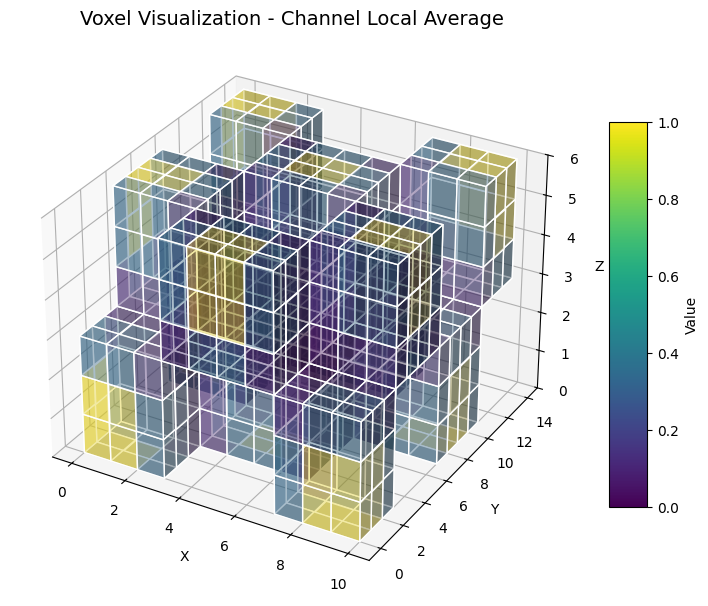

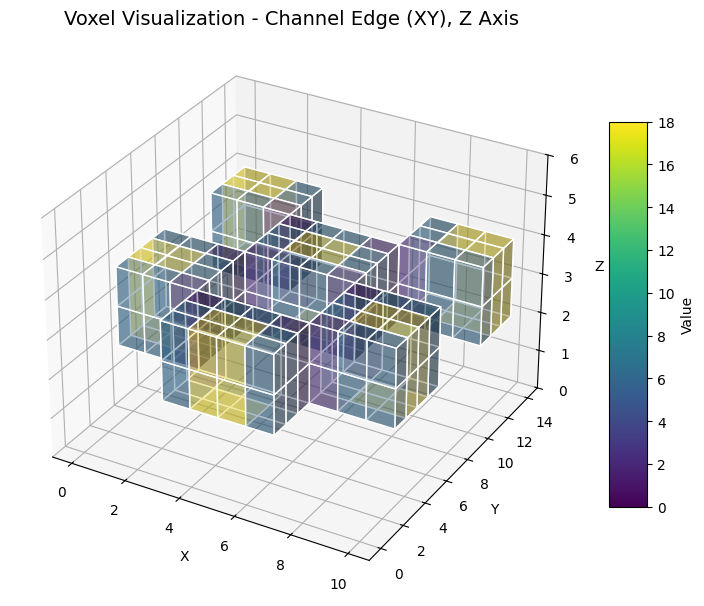

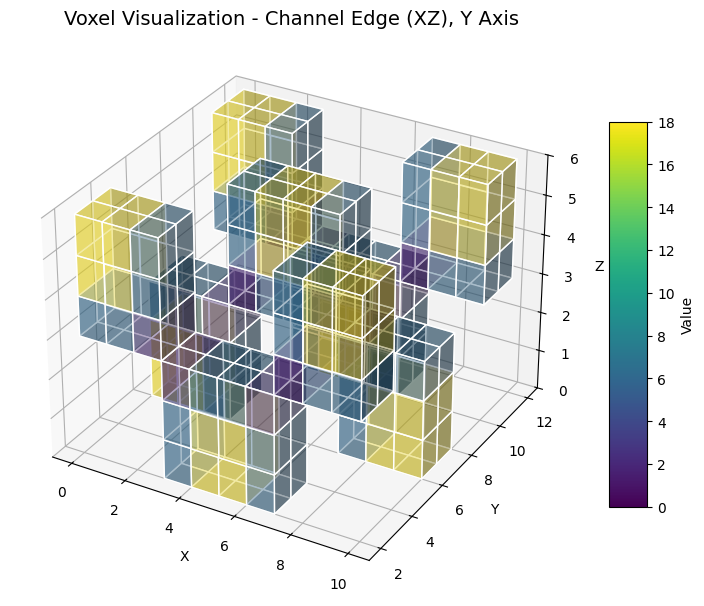

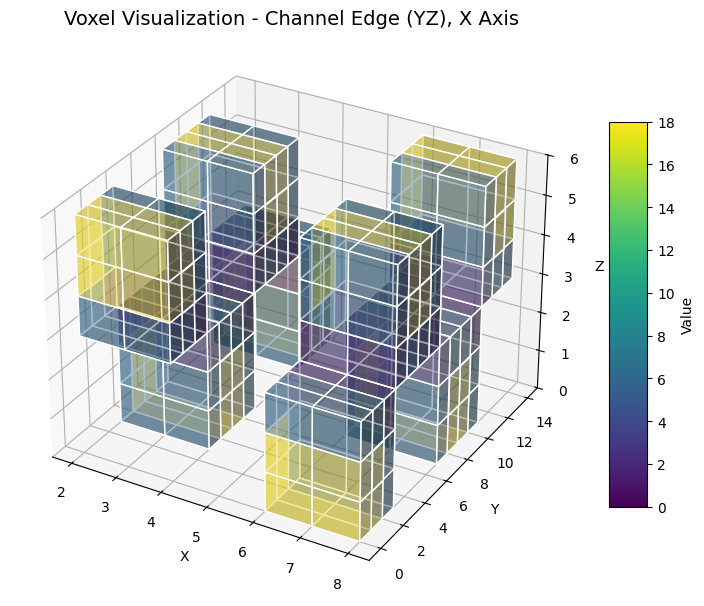

In [7]:
relu = nn.ReLU()
model_relu = nn.Sequential(conv, relu)

features_relu = model_relu(image.unsqueeze(0))

plot_channels(features_relu[0].detach())

## Implementing Pooling Layers

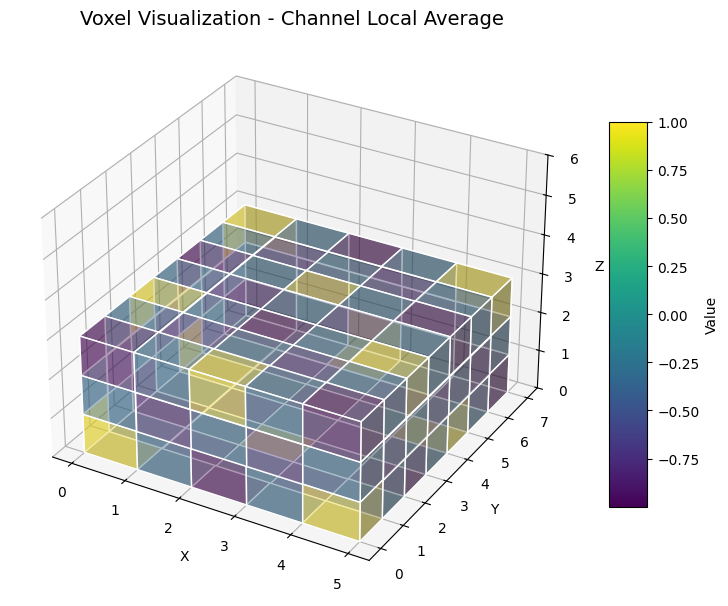

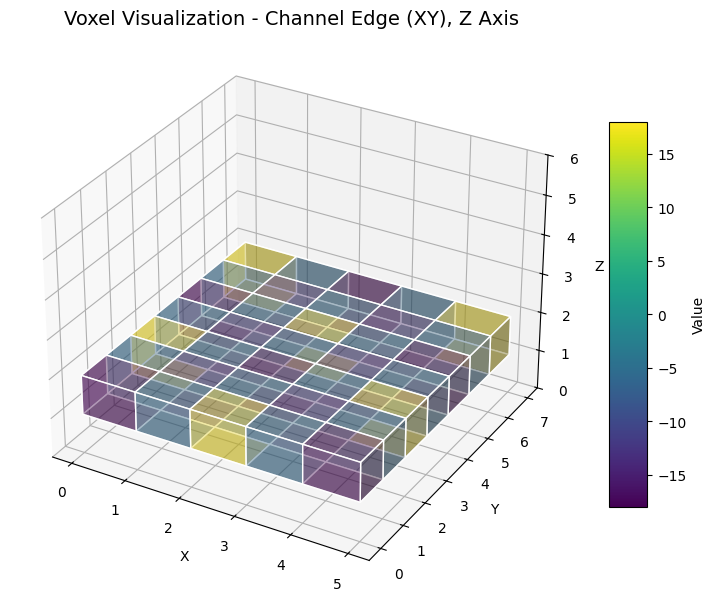

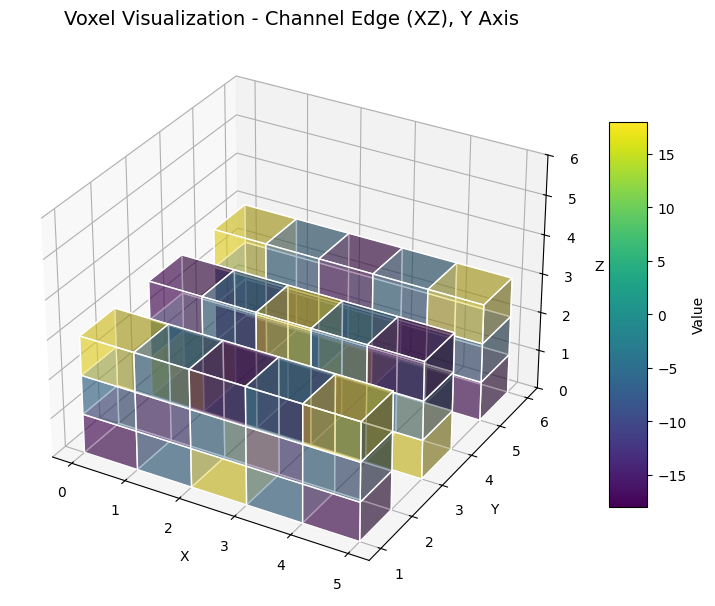

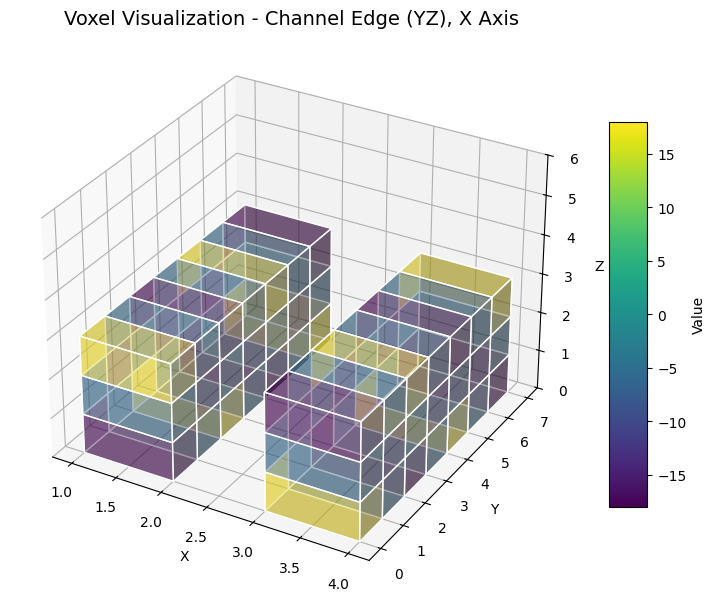

In [8]:
pool = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
model_pool = nn.Sequential(conv, pool)

features_pool = model_pool(image.unsqueeze(0))

plot_channels(features_pool[0].detach())

## Implementing Upsampling Layers


In [9]:
upsample = nn.Upsample(scale_factor=(2, 1))
model_upsample = nn.Sequential(conv, upsample)

features_upsample = model_upsample(image.unsqueeze(0))

plot_channels(features_upsample[0].detach(), figsize=(15, 8))

ValueError: Input and scale_factor must have the same number of spatial dimensions, but got input with spatial dimensions of [10, 14, 6] and scale_factor of shape (2.0, 1.0). Please provide input tensor in (N, C, d1, d2, ...,dK) format and scale_factor in (s1, s2, ...,sK) format.

## Transforming Images

Implement a convolutional neural network to transform an image ...

In [12]:
model_trans = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
)
image_trans = model_trans(image.unsqueeze(0))[0]

... and check the dimensions of the input image ...

In [13]:
print(f"Input image with {image.shape}")

Input image with torch.Size([1, 12, 16])


... and of the output image.

In [14]:
print(f"Output image with {image_trans.shape}")

Output image with torch.Size([32, 1, 2])


## 

## Using Dense Layers to Classify Images

Implement a convolutional neural network with a dense top to classify images ...

In [15]:
model_clas = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=32 * 1 * 2, out_features=2),
    nn.Softmax(dim=1),
)
classification = model_clas(image.unsqueeze(0))[0]

... and check the dimensions of the input image ...

In [16]:
print(f"Input image with {image.shape}")

Input image with torch.Size([1, 12, 16])


... and of the neural network output.

In [17]:
print(f"Output classification with {classification.shape}")

Output classification with torch.Size([2])
